In [15]:
import joblib

model = joblib.load('LR-model.joblib')

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import preprocessing_utils as prep

new_df = pd.read_csv('idea_data_2024.csv')
new_df["timestamp"] = pd.to_datetime(new_df["timestamp"])

# Define the start and end dates for your date range
start_date = '2024-03-15'  # Your desired start date
end_date = '2024-03-16'    # Your desired end date

# Convert these dates to datetime objects for proper comparison
start_datetime = pd.to_datetime(start_date)
end_datetime = pd.to_datetime(end_date)

# Filter the DataFrame for the date range
# The .dt.date converts the timestamp to just the date part for comparison
df = new_df[
    (new_df['timestamp'].dt.date >= start_datetime.date()) & 
    (new_df['timestamp'].dt.date <= end_datetime.date())
].copy()


In [17]:
df

,timestamp,open,high,low,close,volume
19368,2024-03-15 09:15:00+05:30,13.15,13.15,13.00,13.05,3788468
19369,2024-03-15 09:16:00+05:30,13.05,13.15,13.00,13.15,6869193
19370,2024-03-15 09:17:00+05:30,13.10,13.20,13.10,13.20,4957037
19371,2024-03-15 09:18:00+05:30,13.20,13.20,13.15,13.20,1542696
19372,2024-03-15 09:19:00+05:30,13.25,13.25,13.20,13.20,2480449
...,...,...,...,...,...,...
19738,2024-03-15 15:25:00+05:30,13.10,13.10,13.10,13.10,754678
19739,2024-03-15 15:26:00+05:30,13.10,13.10,13.10,13.10,713923
19740,2024-03-15 15:27:00+05:30,13.10,13.15,13.10,13.15,1378641
19741,2024-03-15 15:28:00+05:30,13.15,13.15,13.10,13.15,1041696


In [18]:

timestamps = df['timestamp'].copy()
values = df['close']
df = prep.predict_trend(df, model)
predictions = df['pred']


c:\Users\Joel\projects\MarginCall\LR-model\preprocessing_utils.py:260: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x = x.fillna(method='ffill').fillna(method='bfill')


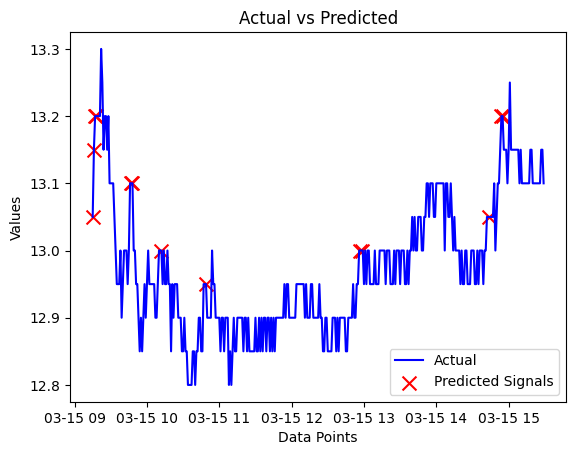

In [19]:
# Plot the predicted values

plt.plot(timestamps, values, label='Actual', linestyle='-', color='blue')

prediction_mask = predictions == 1
predicted_timestamps = timestamps[prediction_mask]
predicted_values = values[prediction_mask]

plt.scatter(predicted_timestamps, predicted_values, 
           label='Predicted Signals', 
           marker='x', 
           color="red",
           s=100)

# Add labels, title, and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted')
plt.legend()

# Show the plot
plt.show()